<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_Numpy_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EA%B3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영상처리

In [3]:
import cv2 #OpenCV 라이브러리를 사용하기 위한 구문
from google.colab.patches import cv2_imshow #코랩에서 시각화를 위해 필요한 구문

In [4]:
cv2.__version__

'4.1.2'

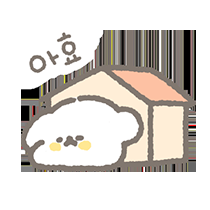

In [5]:
path = '/content/drive/MyDrive/module/ahooo.png'
image = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(image)

In [6]:
print(type(image))

<class 'numpy.ndarray'>


In [7]:
print(image.shape) #3은 rgb 색상

(210, 210, 3)


#빈 이미지 만들어서 작업하기

In [8]:
import numpy as np
image = np.zeros((28,28,3), np.uint8)

In [9]:
cv2_imshow(image)

In [ ]:
print(image)

In [10]:
image[:, :, 0]=255
print(image)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [11]:
cv2_imshow(image)

In [13]:
image[:, :, 2]=255
cv2_imshow(image) #영상처리도 내부적으로는 numpy


In [14]:
from tensorflow import keras

In [16]:
data = keras.datasets.mnist.load_data()
print(type(data))

<class 'tuple'>


In [17]:
train_data, test_data = data #학습터 데이터 평가용 데이터
print(type(train_data))
print(len(train_data))

<class 'tuple'>
2


In [18]:
image_train, label_train = train_data #이미지 데이터와 정답 데이터
print(image_train.shape)
print(label_train.shape)

(60000, 28, 28)
(60000,)


In [19]:
image=image_train[0]
cv2_imshow(image)

#비슷한 데이터의 평균으로 예측

In [43]:
from tensorflow import keras
data = keras.datasets.mnist.load_data() #손글씨 데이터를 로딩
train_data, test_data = data #학습데이터와 평가데이터
image_train, label_train = train_data #학습이미지와 정답
image_test, label_test = test_data #평가이미지와 정답

print(image_train.shape, label_train.shape)
image_train2 = image_train.reshape(60000, -1)
print(image_train2.shape)
image_test2 = image_test.reshape(10000, -1)

(60000, 28, 28) (60000,)
(60000, 784)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model = KNeighborsClassifier() #모델 생성
model.fit(image_train2,label_train) # 학습(독립변수, 종속변수)

KNeighborsClassifier()

In [46]:
pred_value = model.predict(image_test2) #예측

In [47]:
correct = 0
for i in range(len(pred_value)):
  if pred_value[i] == label_test[i]:
    correct += 1
print(correct, "/", len(pred_value))

9688 / 10000


#러프하게

동전을 던졌을 때 앞면이 나올 확률을 1/2이라고 가정하자.

동전을 100번 던졌을 때 앞면이 몇 번 나오는지 테스트를 만 번 수행하여 수행 결과를 배열로 만드시오.


In [48]:
import random

In [65]:
#전제 조건: 동전을 던졌을 때 앞면이 나올 확률은 1/2
#동전을 100번 던져서 앞면이 나온 횟수를 반환

def test_n(n=100):
  cnt=0
  for i in range(n):
    if random.randrange(0,2) ==1:
      cnt+=1
  return cnt


In [66]:
for i in range(100):
  print(test_n(), end=' ')

51 47 48 61 50 44 50 48 49 48 52 49 49 44 38 51 49 46 57 47 49 50 48 50 49 49 52 52 53 46 46 45 54 44 54 52 53 54 45 43 54 57 53 53 50 50 54 44 58 47 53 49 53 51 48 51 44 45 49 40 60 45 51 52 46 52 54 42 57 46 45 49 49 51 43 48 42 54 48 48 54 49 46 49 49 46 43 53 46 56 50 43 49 44 54 53 48 45 42 48 

In [68]:
na = np.zeros(100) #앞면이 몇 번 나왔는지 기록할 배열
for i in range(10000): #실험을 10만번 수행
  na[test_n()] += 1 #실험해서 앞면이 나온 원소 값을 1 증가
print(na)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   1.   2.   4.   5.  13.  11.  19.  45.  85. 113. 163.
 202. 274. 390. 467. 588. 660. 709. 790. 764. 791. 765. 646. 597. 535.
 383. 295. 233. 151. 107.  69.  47.  30.  29.   8.   5.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [60]:
import matplotlib.pyplot as plt

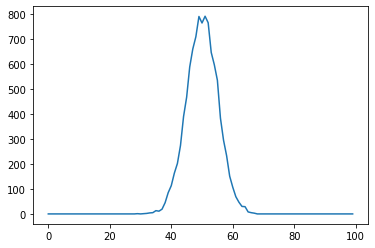

In [69]:
plt.plot(na)

어느 카지노에서 동전을 100번 던져서 몇 번 나오는지 배팅하는 게임이 있다.

길동이 카지노에 가서 67번 나오는 것에 배팅을 하였는데 대박을 맞을 확률은?

해당 카지노의 동전은 앞면이 나올 확률이 1/2라고 말할 수 있는지 검정하시오

In [72]:
nac = np.cumsum(na)
print(nac[33]*2/100000*100, "%")

0.0015999999999999999 %


In [73]:
print("평균 : " , np.mean(na), " 표준편차 : ", np.std(na) )

평균 :  100.0  표준편차 :  215.15329418812067


In [75]:
#정규분포를 표준정규분포로 전환 - 스케일 조정
na2 = na-np.mean(na)
print("평균 : ", np.mean(na2), "표준 편차 : ", np.std(na2))
na3 = na2/np.std(na2)
print("평균 : ", np.mean(na3), "표준 편차 : ", np.std(na3))

평균 :  0.0 표준 편차 :  215.15329418812067
평균 :  1.2212453270876722e-17 표준 편차 :  1.0


<function matplotlib.pyplot.show>

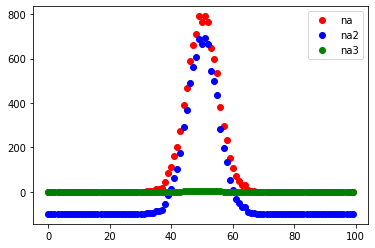

In [76]:
plt.plot(na, 'ro', label='na')
plt.plot(na2, 'bo', label='na2')
plt.plot(na3, 'go', label='na3')
plt.legend()
plt.show

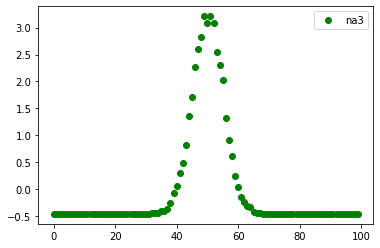

In [77]:
plt.plot(na3, 'go', label='na3')
plt.legend()
plt.show()